In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [3]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
item = "Granite_maul"

In [5]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Granite_hammer', 14), ('Elder_maul', 13), ('Granite_longsword', 12), ('Granite_boots', 12), ('Granite_ring', 12)]
['Granite_hammer', 'Elder_maul', 'Granite_longsword', 'Granite_boots', 'Granite_ring']


In [6]:
items.getPrices(item)[-10:]

[30304, 30366, 30443, 30267, 30233, 30226, 30229, 30219, 30159, 30079]

In [7]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Granite_maul.png',
 'lowAlch': '20000',
 'examine': 'Simplicity is the best weapon.',
 'highAlch': '30000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '4.535',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Granite_maul',
 'alchable': 'True',
 'exchangePrice': '29989',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

1312 0


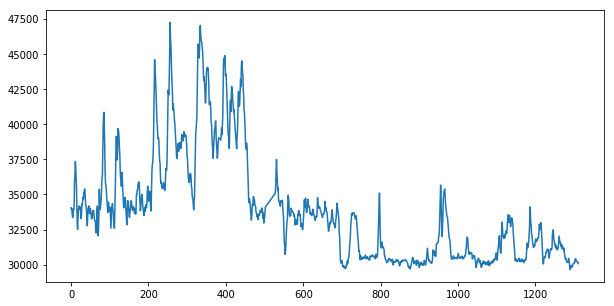

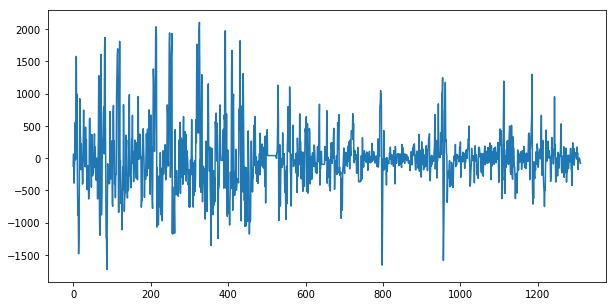

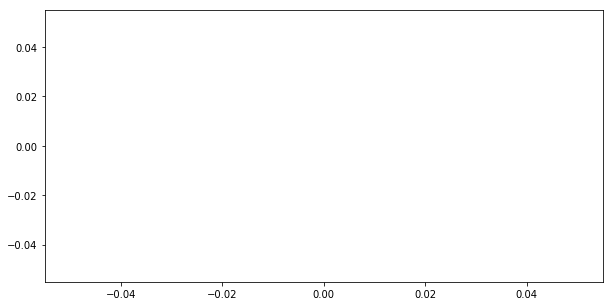

In [8]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
quant = items.getQuants(item)
print(len(prices),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices,label='Price')
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1301 1301


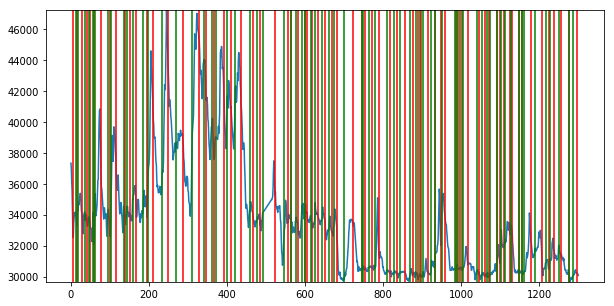

In [9]:
ma12 = items.sma(prices,12)
ma3 = items.sma(prices,3)[-1*len(ma12):]
print(len(ma3),len(ma12))

smaSell = []
smaBuy = []
for i in range(1,len(ma12)):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        smaSell.append(i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        smaBuy.append(i)
        
smaSignals = [0]*len(ma12)
for a in smaSell:
    smaSignals[a] = -1
for a in smaBuy:
    smaSignals[a] = 1
        
plt.plot(prices[-1*len(ma12):])
top = max(prices)+1
for c in smaSell:
    plt.plot([c,c],[0,top],'r')
for c in smaBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

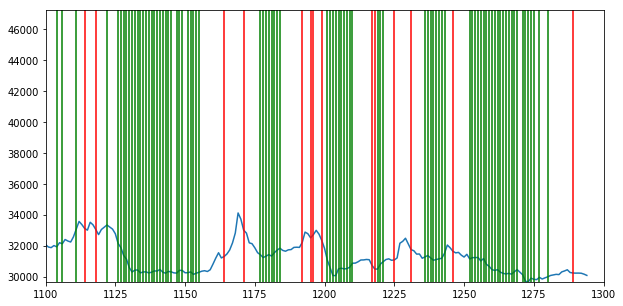

In [10]:
kSlow, D = items.stochOscil(prices)
kSlow = kSlow[-1*len(D):]
    
stochSell = []
stochBuy = []
for i in range(1,len(D)):
    if kSlow[i]<20:
        stochBuy.append(i)
    elif kSlow[i]<80 and D[i]<80 and kSlow[i-1]<D[i-1] and kSlow[i]>D[i]:
        stochBuy.append(i)
    if kSlow[i-1]>kSlow[i] and kSlow[i-1]>90:
        stochSell.append(i)
        
stochSignals = [0]*len(D)
for a in stochSell:
    stochSignals[a] = -1
for a in stochBuy:
    stochSignals[a] = 1
        
plt.plot(prices[-1*len(D):])
top = max(prices)+1
for c in stochSell:
    plt.plot([c,c],[0,top],'r')
for c in stochBuy:
    plt.plot([c,c],[0,top],'g')
plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

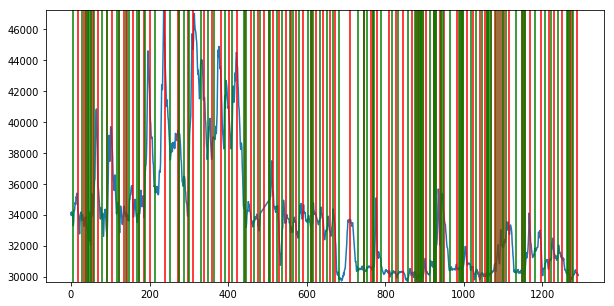

In [11]:
mom, momMA = items.momentum(prices)
mom = mom[-1*len(momMA):]

momSell = []
momBuy = []
for i in range(1,len(momMA)):
    if mom[i-1]>momMA[i-1] and mom[i]<momMA[i]:
        momSell.append(i)
    if mom[i-1]<momMA[i-1] and mom[i]>momMA[i]:
        momBuy.append(i)

momSignals = [0]*len(momMA)
for a in momSell:
    momSignals[a] = -1
for a in momBuy:
    momSignals[a] = 1
        
plt.plot(prices[-1*len(momMA):])
top = max(prices)+1
for c in momSell:
    plt.plot([c,c],[0,top],'r')
for c in momBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

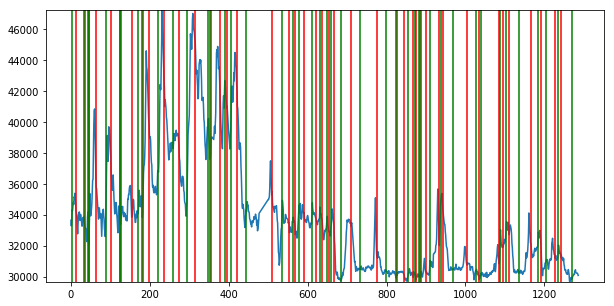

In [12]:
ema9, macd = items.macd(prices)
ema9 = ema9[-1*len(macd):]

macdSell = []
macdBuy = []
for i in range(1,len(macd)):
    if ema9[i-1]>macd[i-1] and ema9[i]<macd[i]:
        macdSell.append(i)
    if ema9[i-1]<macd[i-1] and ema9[i]>macd[i]:
        macdBuy.append(i)
        
macdSignals = [0]*len(macd)
for a in macdSell:
    macdSignals[a] = -1
for a in macdBuy:
    macdSignals[a] = 1
        
plt.plot(prices[-1*len(macd):])
top = max(prices)+1
for c in macdSell:
    plt.plot([c,c],[0,top],'r')
for c in macdBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

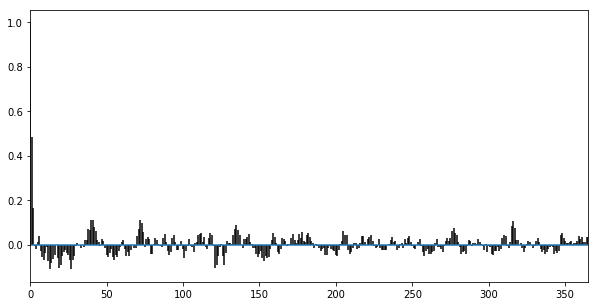

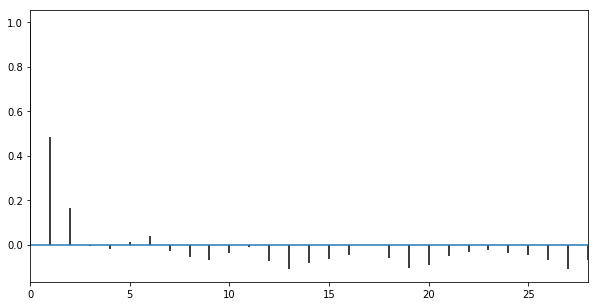

In [13]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [14]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

#features = [changes,momSignals,smaSignals,stochSignals,macdSignals]
#features = [changes]
features = [smaSignals,momSignals,stochSignals,macdSignals]
#features = [ma3,ma12,ema9,macd,mom,momMA,kSlow,D]

fsizes = [1,1,1,1]

x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(len(features)):
    features[i] = features[i][-1*fMin:]

s1 = int(len(features[0])*.8)
s2  =int(len(features[0])*.9)
for i in range(len(features)):
    features[i][:s2] = list(scaler.fit_transform(np.array(features[i][:s2]).reshape(-1, 1)).reshape(len(features[i][:s2]),))
    features[i][s2:] = list(scaler.fit_transform(np.array(features[i][s2:]).reshape(-1, 1)).reshape(len(features[i][s2:]),))
        
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        #print(type(xelem),type(features[j][i-fsizes[j]:i]))
        xelem = xelem + list(features[j][i-fsizes[j]:i])
    x.append(xelem)
    y.append(classify(changes[i]))
    p.append(prices[i])
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
#y = keras.utils.to_categorical(y, num_classes=2)

[0.0, 1.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0]
4 4
0 0


c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\martin\appdata\loca

1029 1029 129 129 128 128 128
4 [0. 1. 0. 0.]
0
4 [0. 0. 0. 0.]
1


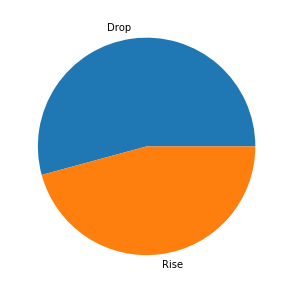

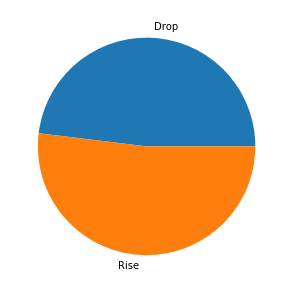

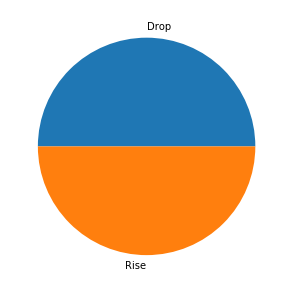

In [67]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [68]:
model = Sequential()
model.add(Dense(int(size), input_dim=size, activation='sigmoid'))
#model.add(Dense(int(size), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=100,
            batch_size=16)

Train on 1029 samples, validate on 129 samples
Epoch 1/100
1029/1029 [==============================] - 1s 558us/step - loss: 0.7333 - acc: 0.4577 - val_loss: 0.7023 - val_acc: 0.5194
Epoch 2/100
1029/1029 [==============================] - 0s 75us/step - loss: 0.7124 - acc: 0.4577 - val_loss: 0.6957 - val_acc: 0.5194
Epoch 3/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.7004 - acc: 0.4694 - val_loss: 0.6938 - val_acc: 0.4884
Epoch 4/100
1029/1029 [==============================] - 0s 65us/step - loss: 0.6938 - acc: 0.4801 - val_loss: 0.6943 - val_acc: 0.4574
Epoch 5/100
1029/1029 [==============================] - 0s 66us/step - loss: 0.6903 - acc: 0.5258 - val_loss: 0.6957 - val_acc: 0.5039
Epoch 6/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.6885 - acc: 0.5656 - val_loss: 0.6972 - val_acc: 0.4884
Epoch 7/100
1029/1029 [==============================] - 0s 65us/step - loss: 0.6877 - acc: 0.5569 - val_loss: 0.6990 - val_acc: 0.4961


In [70]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

128/128 [==============================] - 0s 609us/step
['loss', 'acc']
[0.687320658005774, 0.5625]
12 4 60 52 128
Accuracy:  0.5625
Precision:  0.75
Recall:  0.1875
F1:  0.3


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


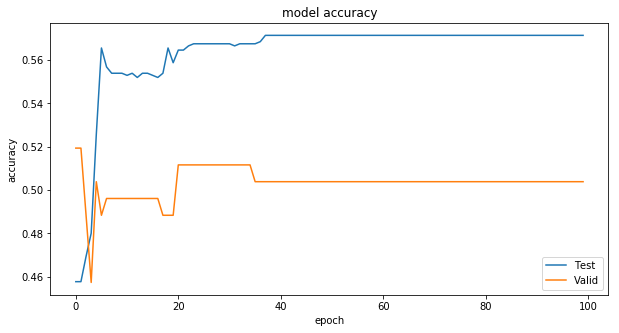

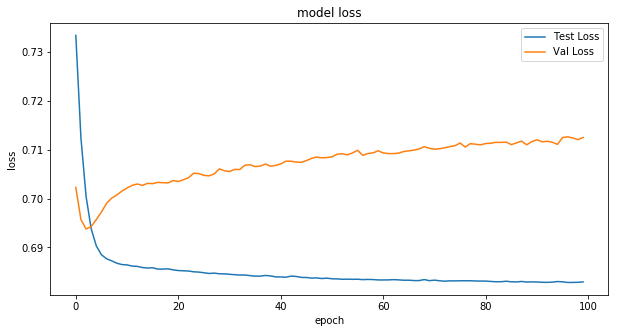

In [71]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [72]:
print(y_test[:20])
print(p_test[:20])

[1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]
[32181. 32818. 34116. 33716. 33004. 32812. 32185. 32128. 31863. 31547.
 31415. 31231. 31322. 31422. 31328. 31549. 31713. 31837. 31695. 31642.]


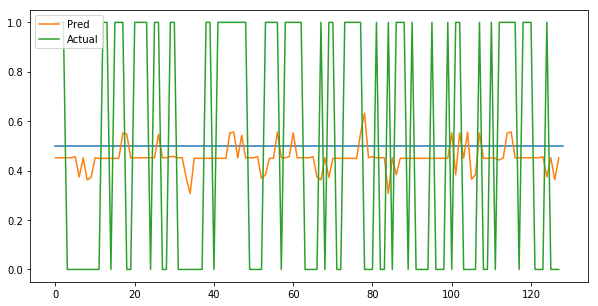

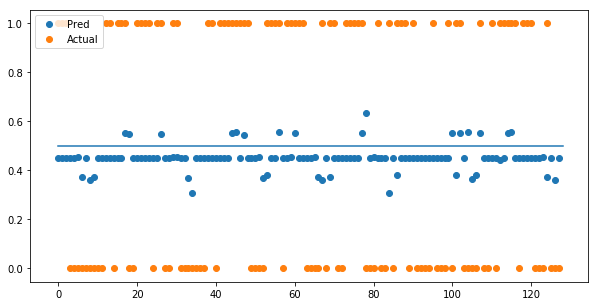

In [73]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test)], [.5, .5])
plt.scatter(range(len(y_test)),y_pred,label='Pred')
plt.scatter(range(len(y_test)),y_test,label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [74]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

128 128 128
100000
1000000
10000000
100000000
1000000000


In [75]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 -0.026685 0.04
	Model No T
	 -0.026685 0
	Persistance
	 0.082815
	Perfect
	 0.33478
	Buy and Hold
	 -0.06306
1000000
	Model
	 -0.0279 0.04
	Model No T
	 -0.0279 0
	Persistance
	 0.087376
	Perfect
	 0.39037
	Buy and Hold
	 -0.065162
10000000
	Model
	 -0.0071295 0.04
	Model No T
	 -0.0071295 0
	Persistance
	 0.0287374
	Perfect
	 0.1621915
	Buy and Hold
	 -0.014714
100000000
	Model
	 -0.00071295 0.04
	Model No T
	 -0.00071295 0
	Persistance
	 0.0027629
	Perfect
	 0.01639855
	Buy and Hold
	 -0.0014714
1000000000
	Model
	 -7.1295e-05 0.04
	Model No T
	 -7.1295e-05 0
	Persistance
	 0.00027629
	Perfect
	 0.001639855
	Buy and Hold
	 -0.00014714


126 125 125 126


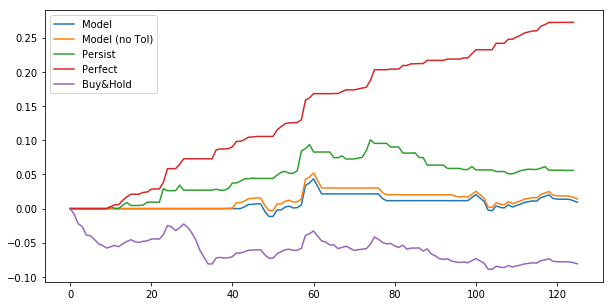

126 125 125 126


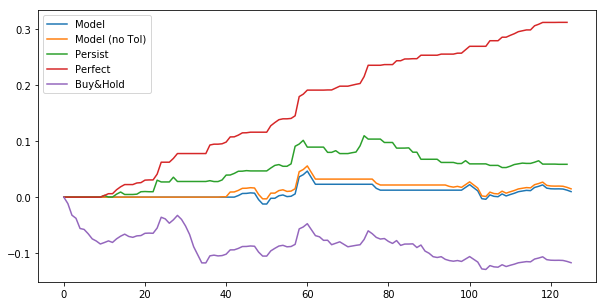

126 125 125 126


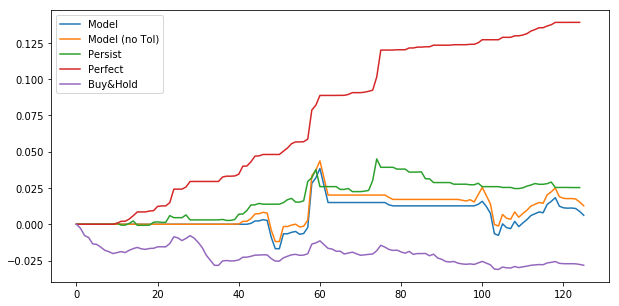

126 125 125 126


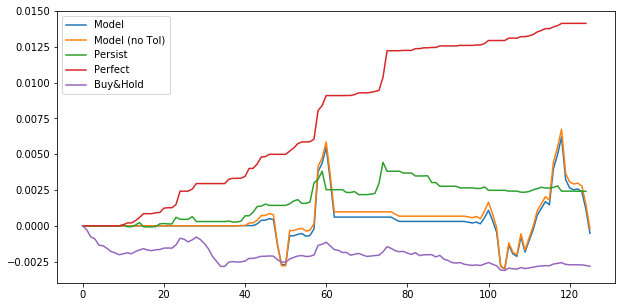

126 125 125 126


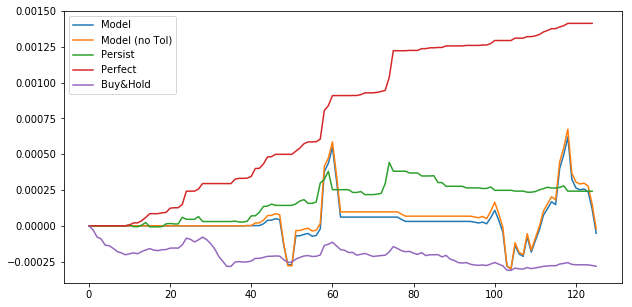

In [54]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()